# **IMPORTING LIBRARIES**

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Read Dataset**

In [14]:
df = pd.read_csv('/Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df = df.drop('Loan_ID', axis=1)

In [16]:
#Checking the data types of columns
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [17]:
#let’s have a look if the data has missing values or not:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [18]:
#let’s have a look at the descriptive statistics of the dataset before filling in the missing values:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
#Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column.
#The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [20]:
# Fill missing values in numerical column
#We can fill in the missing values of the loan amount column with the median value.
#The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

#We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

#We can fill in the missing values of the credit history column with the mode value.
#Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



# **Data Exploration and Visualization**

## *Distribution of the loan status*





In [21]:
fig_loan_status=px.histogram(df,x='Loan_Status',title='Loan Status Distribution')
fig_loan_status.show()

## *Distribution of  Gender*

In [22]:
fig_gender=px.histogram(df,x='Gender',title='Gender Distribution',color_discrete_sequence = ['darkseagreen'])
fig_gender.show()

## *Distribution of the Martial Status*

In [23]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,
                     x=married_count.index,
                     y=married_count.values,
                     title='Marital Status Distribution')
fig_married.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_married.show()

## *Distribution of the Self-employment*

In [24]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='Self-Employment Distribution')
fig_self_employed.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_self_employed.show()

##*Education Distribution*

In [25]:
fig_education=px.histogram(df,x='Education',title='Education Distribution',color_discrete_sequence = ['darkseagreen'])

fig_education.show()

## *Distribution of the Applicant Income*

In [26]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome',
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

## *Distribution of Coapplicant Income*

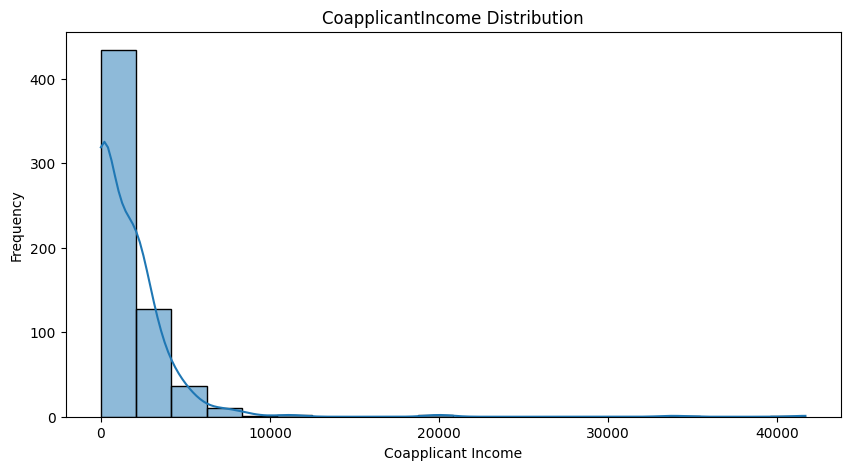

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='CoapplicantIncome', bins=20, kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('CoapplicantIncome Distribution')
plt.show()

##*Loan Amount Distribution*

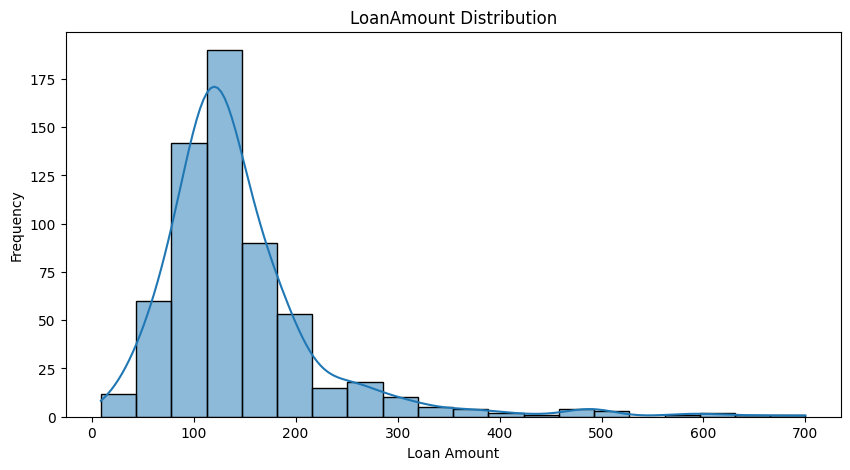

In [28]:

df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='LoanAmount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

## *Applicant Income vs.Loan Amount*

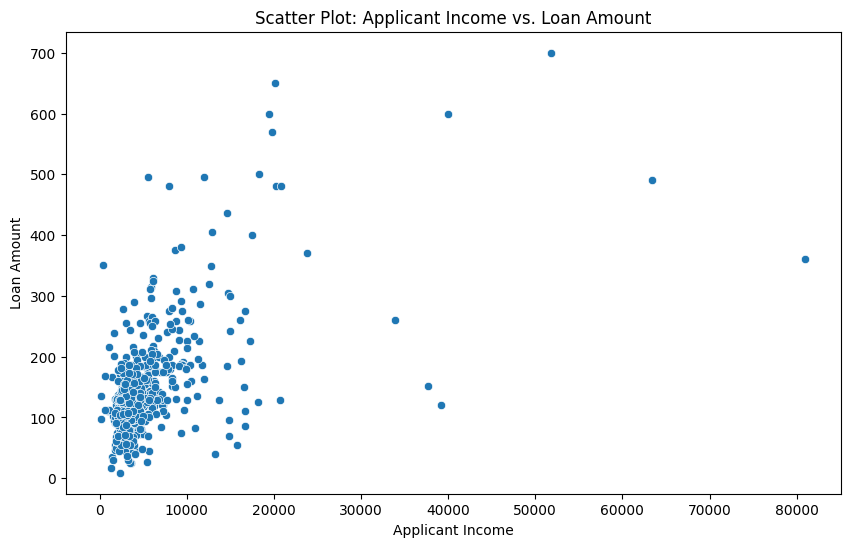

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()


## *Married vs. Applicant Income*

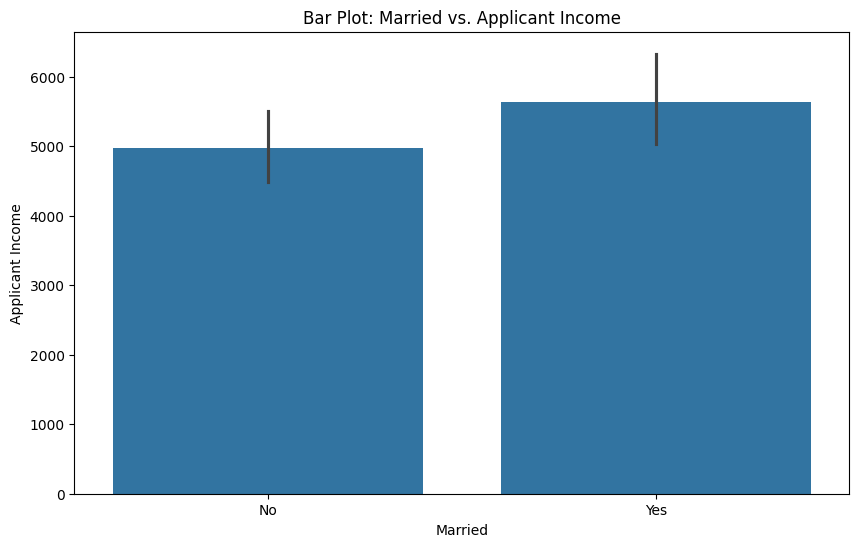

In [30]:

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Married', y='ApplicantIncome')
plt.xlabel('Married')
plt.ylabel('Applicant Income')
plt.title('Bar Plot: Married vs. Applicant Income')
plt.show()

## *Applicant Income vs. Education*

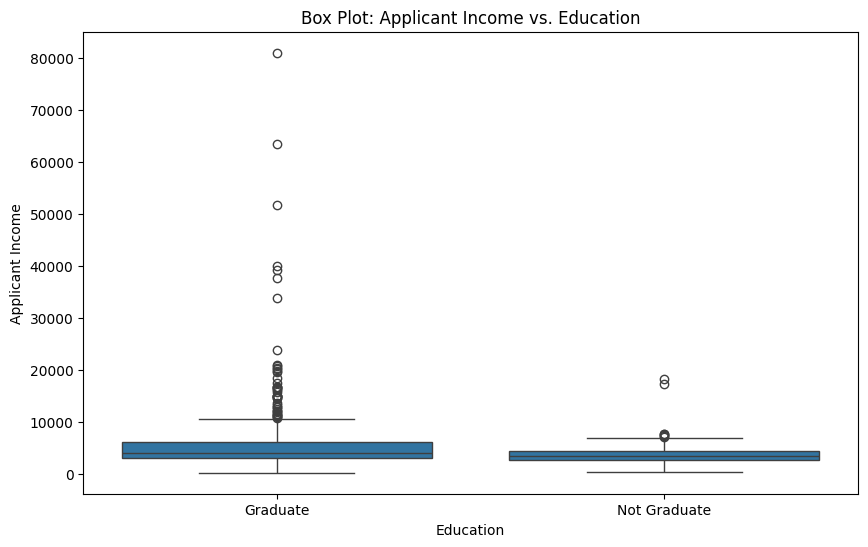

In [31]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

## *Credit History vs. Loan Status*

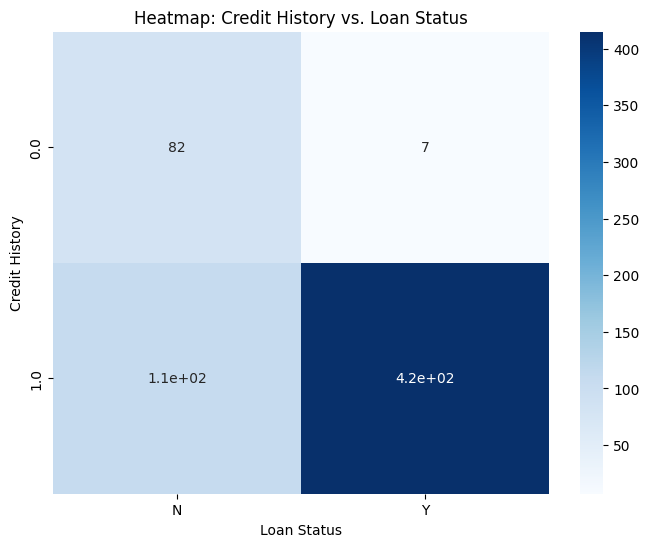

In [32]:
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
cross_tab = pd.crosstab(df['Credit_History'], df['Loan_Status'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()


## *Loan_Status vs Property_Area*

In [33]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status',
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

## *Pair Plots by Loan Status*

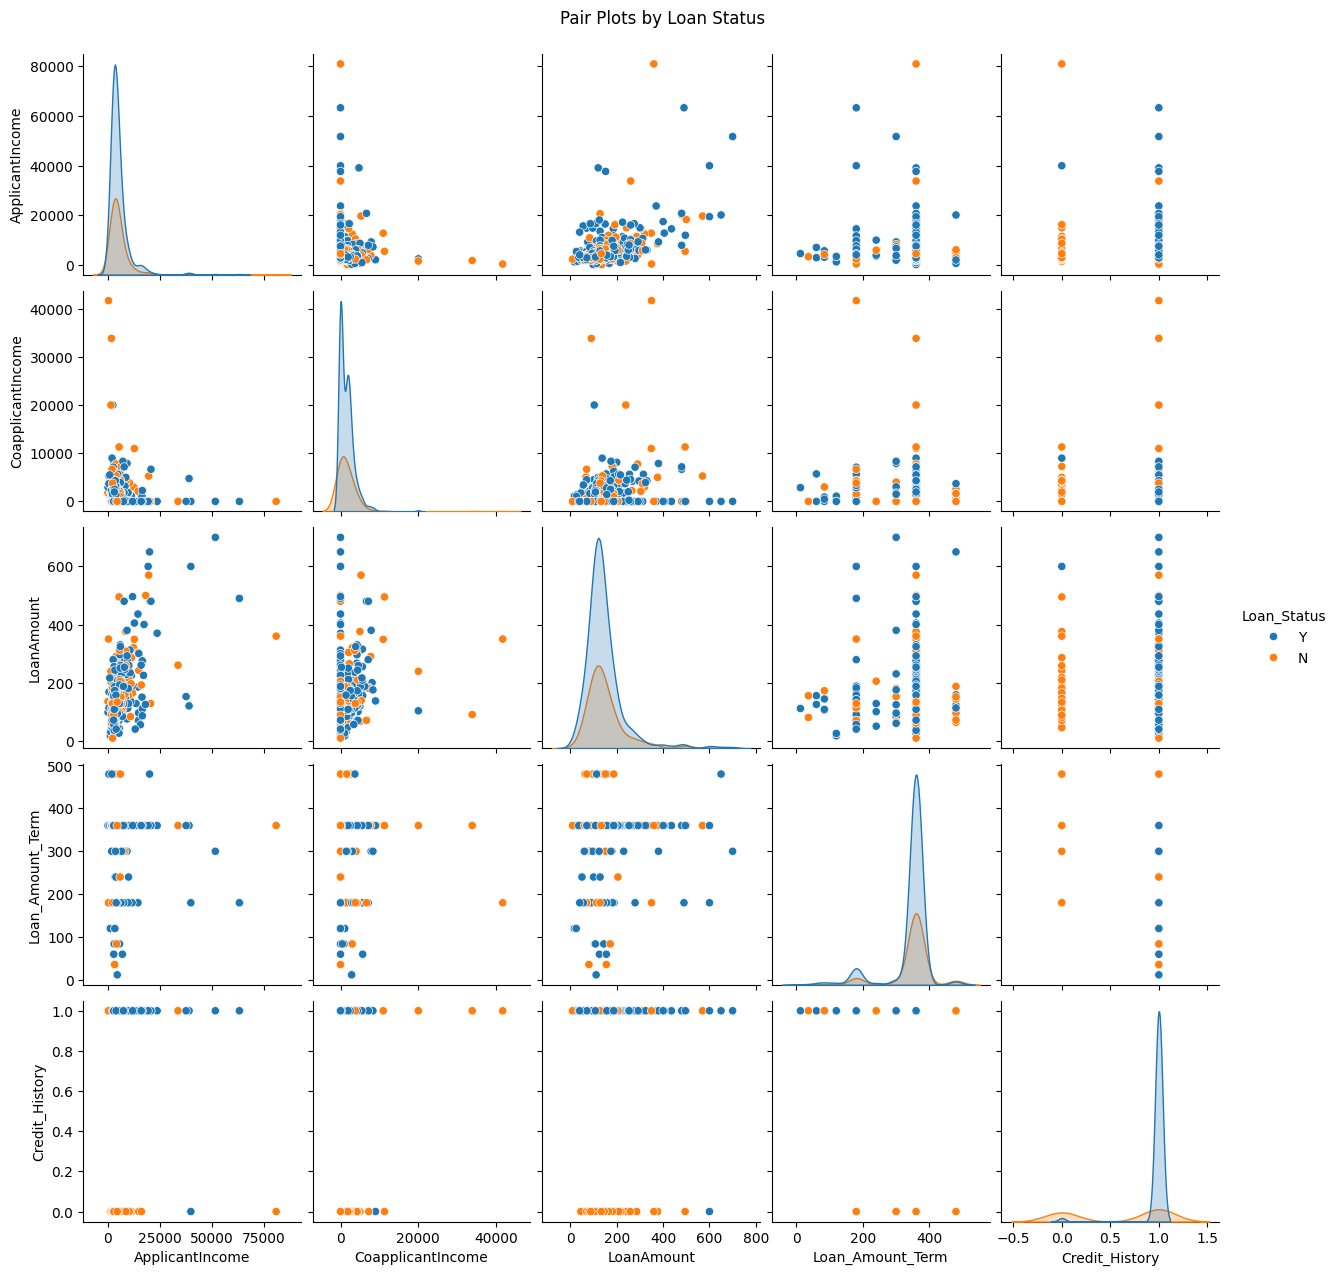

In [34]:

sns.pairplot(df, hue='Loan_Status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

### *Detecting outliers and removing them*

In [35]:
fig_income = px.box(df, x='Loan_Status',
                    y='ApplicantIncome',
                    color="Loan_Status",
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [36]:
# The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]




In [37]:
fig_coapplicant_income = px.box(df,
                                x='Loan_Status',
                                y='CoapplicantIncome',
                                color="Loan_Status",
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [38]:
# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:


# Calculate the IQR

Q1 = df['CoapplicantIncome'].quantile(0.25)

Q3 = df['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


# Remove outliers

df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'])]

## *Relationship between the Property Area and the Loan Status*

In [39]:


fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status',

                                 barmode='group',

                                title='Loan_Status vs Property_Area')

fig_property_area.show()

## *Relationship between Credit History and Loan Status*

In [40]:
#Now let’s have a look at the relationship between credit history and loan status:


fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status',

                                  barmode='group',

                                  title='Loan_Status vs Credit_His')

fig_credit_history.show()

# **Data Preparation**

In [41]:

#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0


In [42]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,-2.187010,-0.844506,-2.372201,-5.482965,-1.292668,0,0
3,1,1,0,1,0,-2.187754,-0.844433,-2.374395,-5.482965,-1.292668,2,1
5,1,1,2,0,1,-2.186699,-0.844275,-2.334085,-5.482965,-1.292668,2,1
6,1,1,0,1,0,-2.187847,-0.844505,-2.381250,-5.482965,-1.292668,2,1
7,1,1,3,0,0,-2.187585,-0.844420,-2.363975,-5.482965,-9.500714,1,0


In [44]:


# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# **Model Building and Evaluation**

In [45]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Confusion Matrix:\n", confusion_mat_xgb)





Logistic Regression:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

    accuracy                           0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
 [[14 13]
 [ 1 72]]



Random Forest Classifier:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.86      0.96      0.91        73

    accuracy                           0.86       100
   macro avg       0.85      0.78      0.80       100
weighted avg       0.86      0.86      0.85       100

Confusion Matrix:
 [[16 11]
 [ 3 70]]



SVC:
Accuracy:  0.86

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.52    

# **Hyperparameter Tuning**

In [46]:
from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)

log_reg_grid.fit(X_train, y_train)

log_reg_best = log_reg_grid.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.8354978354978355
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

    accuracy                           0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
[[14 13]
 [ 1 72]]
